[![img](..\ep8_2018-57x57.png)](http://endlesspint.com/)

# Sleep No More - Caffeine

**post @** [endlesspint.com](http://endlesspint.com/2019-05-17-sleep-no-more-caffeine/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

plt.style.use('ggplot')
%matplotlib inline

In [2]:
half_life = 5.0
half_hour_decay = np.exp(-np.log(2) * (0.5 / half_life))

half_hour_decay

0.9330329915368074

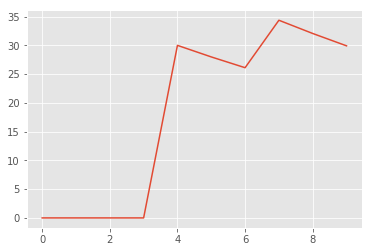

In [3]:
# toy sample

t = np.zeros(10)
c = np.array([0, 0, 0, 30, 0, 0, 10, 0, 0, 0])

for i in range(2, len(t)):
    t[i] += t[i-1] * half_hour_decay + c[i-1]
    
plt.plot(t)

In [4]:
intake = pd.read_excel("11day_intake.xlsx")
intake.head(10)

,Day,Time,Substance,Amount (g),Caffeine (mg)
0,1,09:30:00,coffee,220,88
1,1,11:00:00,coffee,220,88
2,2,09:00:00,espresso,80,170
3,2,10:00:00,espresso,80,170
4,2,12:30:00,dark choc (60-85%),35,14
5,3,09:00:00,coffee,220,88
6,3,10:00:00,coffee,110,44
7,3,16:30:00,dark choc (60-85%),35,14
8,4,08:30:00,coffee,220,88
9,5,08:30:00,espresso,40,85


In [5]:
intake_ts_day = pd.pivot_table(intake, values="Caffeine (mg)", index="Time", columns="Day").fillna(0)
intake_ts_day

Day,1,2,3,4,5,6,7,8,9,10,11
Time,,,,,,,,,,,
08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,88.0
08:30:00,0.0,0.0,0.0,88.0,85.0,0.0,0.0,0.0,88.0,0.0,0.0
09:00:00,0.0,170.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0
09:30:00,88.0,0.0,0.0,0.0,85.0,0.0,170.0,0.0,0.0,0.0,170.0
10:00:00,0.0,170.0,44.0,0.0,0.0,0.0,0.0,88.0,88.0,0.0,0.0
10:30:00,0.0,0.0,0.0,0.0,0.0,170.0,170.0,0.0,0.0,170.0,0.0
11:00:00,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
11:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12:30:00,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
intake_ts_day[2][datetime.time(9,0)]

170.0

In [7]:
# dummy Y/M/D
six_am = datetime.datetime(2019, 1, 1, 6, 0) 

time_idx = []

for i in range(48):
    step = 30 * i
    time_idx.append((six_am + datetime.timedelta(minutes = step)).time())
    
print(time_idx[:10])

df_time_idx = pd.DataFrame(np.zeros(len(time_idx)), index=time_idx)
df_time_idx.head()

[datetime.time(6, 0), datetime.time(6, 30), datetime.time(7, 0), datetime.time(7, 30), datetime.time(8, 0), datetime.time(8, 30), datetime.time(9, 0), datetime.time(9, 30), datetime.time(10, 0), datetime.time(10, 30)]


,0
06:00:00,0.0
06:30:00,0.0
07:00:00,0.0
07:30:00,0.0
08:00:00,0.0


In [8]:
df = pd.concat([intake_ts_day, df_time_idx], axis=1, sort=True).fillna(0)
df_intake_ts_day = df.loc[time_idx, :11]
df_intake_ts_day.columns = ['day_' + str(i) for i in df_intake_ts_day.columns]
df_intake_ts_day.head(20)

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11
06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,88.0
08:30:00,0.0,0.0,0.0,88.0,85.0,0.0,0.0,0.0,88.0,0.0,0.0
09:00:00,0.0,170.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0
09:30:00,88.0,0.0,0.0,0.0,85.0,0.0,170.0,0.0,0.0,0.0,170.0
10:00:00,0.0,170.0,44.0,0.0,0.0,0.0,0.0,88.0,88.0,0.0,0.0
10:30:00,0.0,0.0,0.0,0.0,0.0,170.0,170.0,0.0,0.0,170.0,0.0


In [9]:
caff_down = {}

for col in df_intake_ts_day.columns:
    dayy = np.zeros(len(time_idx))
    caff = df_intake_ts_day[col].values
    
    for i in range(2, len(dayy)):
        dayy[i] += dayy[i-1] * half_hour_decay + caff[i-1]
        
    caff_down[col] = dayy

df_caff_down = pd.DataFrame(caff_down, index=time_idx)
df_caff_down

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11
06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
06:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
08:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,88.000000
09:00:00,0.000000,0.000000,0.000000,88.000000,85.000000,0.000000,0.000000,0.000000,88.000000,82.106903,82.106903
09:30:00,0.000000,170.000000,88.000000,82.106903,79.307804,0.000000,0.000000,0.000000,82.106903,164.608450,76.608450
10:00:00,88.000000,158.615609,82.106903,76.608450,158.996798,0.000000,170.000000,0.000000,76.608450,153.585114,241.478211
10:30:00,82.106903,317.993596,120.608450,71.478211,148.349258,0.000000,158.615609,88.000000,159.478211,143.299978,225.307137


In [10]:
df_caff_down['day_split'] = 'A - '
df_caff_down.loc[time_idx[-12:], 'day_split'] = 'B - '
df_caff_down['day_time'] = [str(i)[:5] for i in df_caff_down.index]
df_caff_down['day_time_split'] =df_caff_down.day_split + df_caff_down.day_time
df_caff_down.tail(15)

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_split,day_time,day_time_split
22:30:00,34.708462,63.999727,29.382259,13.542589,54.268747,43.757282,64.572765,34.704105,38.700752,126.322222,62.214727,A -,22:30,A - 22:30
23:00:00,32.384140,59.713857,27.414617,12.635682,50.634532,40.826988,60.248520,32.380075,36.109079,117.862801,58.048393,A -,23:00,A - 23:00
23:30:00,30.215471,55.714999,25.578742,11.789508,47.243689,38.092927,56.213857,30.211678,33.690962,109.969881,54.161066,A -,23:30,A - 23:30
00:00:00,28.192031,51.983932,23.865810,11.000000,44.079920,35.541957,52.449383,28.188493,31.434779,102.605527,50.534061,B -,00:00,B - 00:00
00:30:00,26.304095,48.502723,22.267588,10.263363,41.128020,33.161819,48.937005,26.300794,29.329686,95.734342,47.149946,B -,00:30,B - 00:30
01:00:00,24.542589,45.254641,20.776395,9.576056,38.373799,30.941071,45.659840,24.539508,27.365564,89.323300,43.992455,B -,01:00,B - 01:00
01:30:00,22.899045,42.224073,19.385062,8.934776,35.804021,28.869040,42.602137,22.896171,25.532974,83.341586,41.046412,B -,01:30,B - 01:30
02:00:00,21.365564,39.396453,18.086902,8.336441,33.406333,26.935767,39.749199,21.362883,23.823107,77.760449,38.297657,B -,02:00,B - 02:00
02:30:00,19.934776,36.758191,16.875676,7.778175,31.169210,25.131959,37.087314,19.932274,22.227745,72.553064,35.732977,B -,02:30,B - 02:30
03:00:00,18.599804,34.296605,15.745563,7.257294,29.081902,23.448947,34.603688,18.597469,20.739220,67.694403,33.340047,B -,03:00,B - 03:00


## different attempts at plotting with time on x-axis

In [11]:
df_caff_down2 = df_caff_down.reset_index().set_index('day_time_split')
df_caff_down2.head()

,index,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_split,day_time
day_time_split,,,,,,,,,,,,,,
A - 06:00,06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A -,06:00
A - 06:30,06:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A -,06:30
A - 07:00,07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A -,07:00
A - 07:30,07:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A -,07:30
A - 08:00,08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A -,08:00


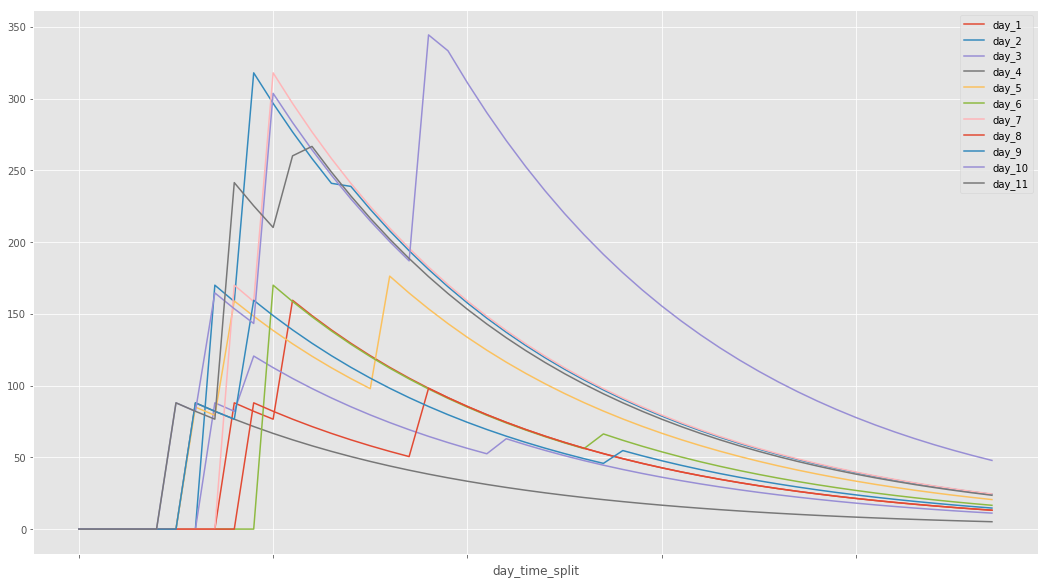

In [12]:
df_caff_down2[df_caff_down2.columns[1:-2]].plot(figsize=(18,10))

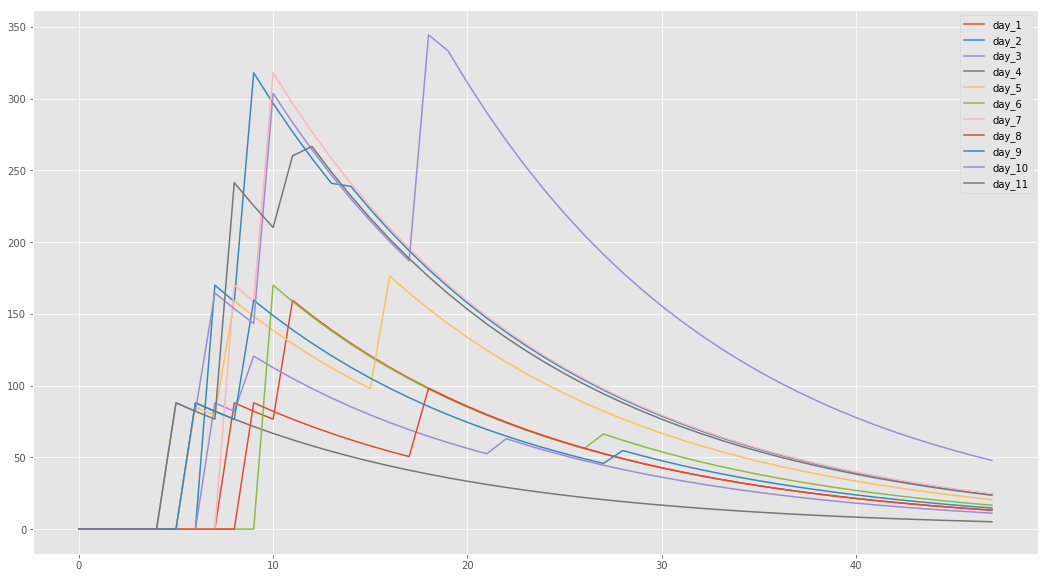

In [13]:
df_caff_down.reset_index()[df_caff_down.columns[0:11]].plot(figsize=(18,10))

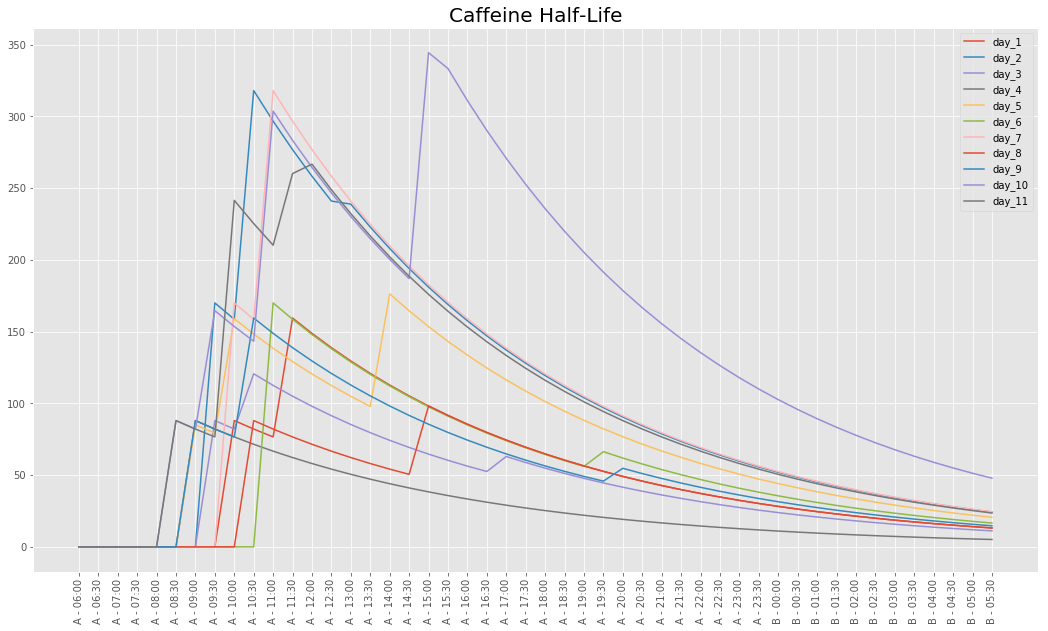

In [14]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation='vertical')

days = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11']

for col in days:

    plt.plot( 'day_time_split', col, data=df_caff_down)

# plt.axvline(x='A - 22:00')
# plt.axhline(y=50)
plt.legend()

plt.title("Caffeine Half-Life", size=20)
plt.savefig("caff_hl.jpg")

In [15]:
df_caff_down['day_q25'] = df_caff_down.quantile(q=0.25, axis=1)
df_caff_down['day_q50'] = df_caff_down.quantile(q=0.50, axis=1)
df_caff_down['day_q75'] = df_caff_down.quantile(q=0.75, axis=1)
df_caff_down.head(15)

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_split,day_time,day_time_split,day_q25,day_q50,day_q75
06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A -,06:00,A - 06:00,0.000000,0.000000,0.000000
06:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A -,06:30,A - 06:30,0.000000,0.000000,0.000000
07:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A -,07:00,A - 07:00,0.000000,0.000000,0.000000
07:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A -,07:30,A - 07:30,0.000000,0.000000,0.000000
08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A -,08:00,A - 08:00,0.000000,0.000000,0.000000
08:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,88.000000,A -,08:30,A - 08:30,0.000000,0.000000,0.000000
09:00:00,0.000000,0.000000,0.000000,88.000000,85.000000,0.000000,0.000000,0.000000,88.000000,82.106903,82.106903,A -,09:00,A - 09:00,0.000000,0.000000,82.106903
09:30:00,0.000000,170.000000,88.000000,82.106903,79.307804,0.000000,0.000000,0.000000,82.106903,164.608450,76.608450,A -,09:30,A - 09:30,0.000000,77.958127,82.106903
10:00:00,88.000000,158.615609,82.106903,76.608450,158.996798,0.000000,170.000000,0.000000,76.608450,153.585114,241.478211,A -,10:00,A - 10:00,76.608450,85.053452,158.615609
10:30:00,82.106903,317.993596,120.608450,71.478211,148.349258,0.000000,158.615609,88.000000,159.478211,143.299978,225.307137,A -,10:30,A - 10:30,85.053452,131.954214,158.615609


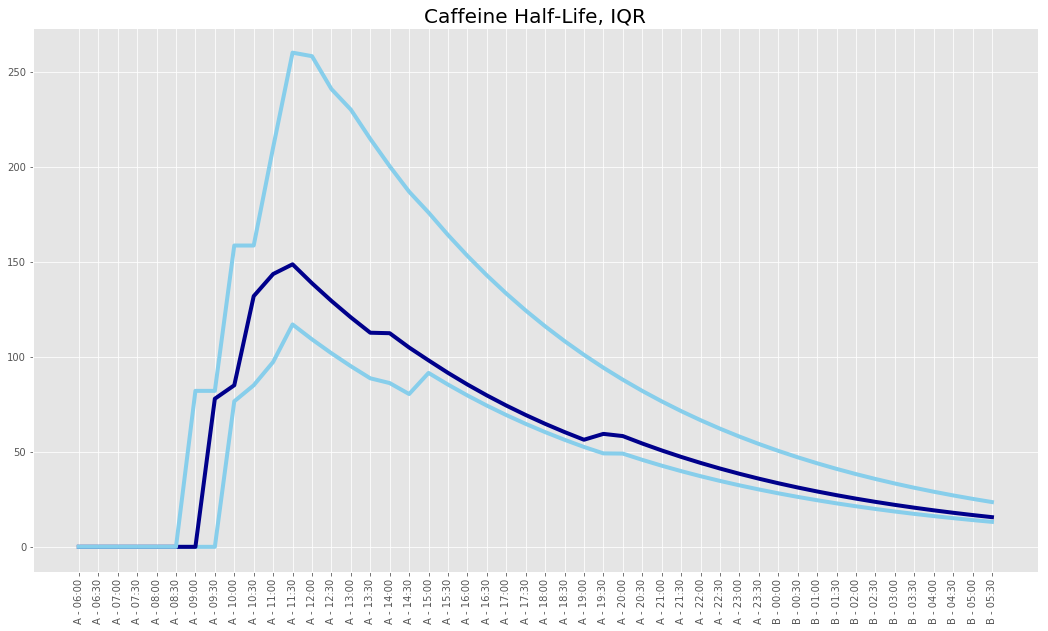

In [16]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation='vertical')

for col in zip(['day_q25', 'day_q50', 'day_q75'],['skyblue', 'darkblue', 'skyblue']):

    plt.plot( 'day_time_split', col[0], data=df_caff_down, color=col[1], linewidth=4)

# plt.axvline(x='A - 22:00')
# plt.axhline(y=50)

plt.title("Caffeine Half-Life, IQR", size=20)
plt.savefig("caff_hl_iqr.jpg")
# plt.legend()

In [17]:
intake_ts_day.sum().describe()

count     11.000000
mean     249.454545
std      129.805519
min       88.000000
25%      161.000000
50%      188.000000
75%      343.000000
max      528.000000
dtype: float64

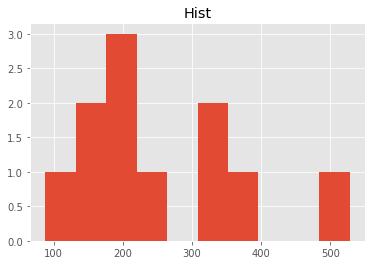

In [18]:
intake_ts_day.sum().hist()
plt.title("Hist")

plt.show()

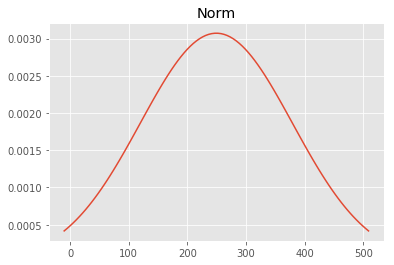

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = intake_ts_day.sum().describe()['mean']
sigma = intake_ts_day.sum().describe()['std']
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.title("Norm")
plt.show()

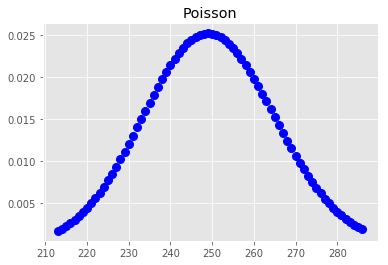

In [20]:
from scipy.stats import poisson

mu = intake_ts_day.sum().describe()['mean']
x_p = np.arange(poisson.ppf(0.01, mu),
                poisson.ppf(0.99, mu))
plt.plot(x_p, poisson.pmf(x_p, mu), 'bo', ms=8, label='poisson pmf')
plt.title("Poisson")

plt.show()

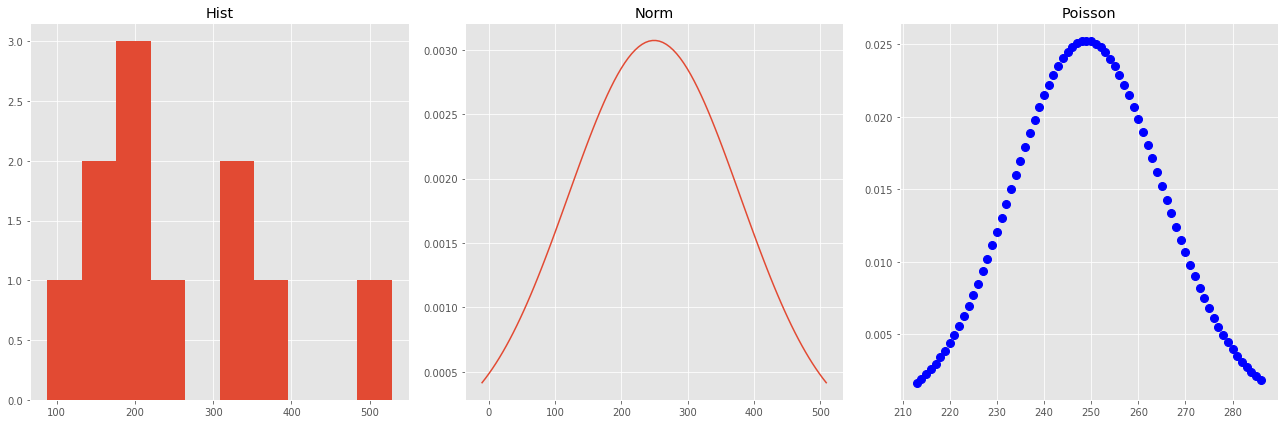

In [21]:
# summary charts, of a sort

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))


ax1.hist(intake_ts_day.sum())
ax1.set_title("Hist")

ax2.plot(x, stats.norm.pdf(x, mu, sigma))
ax2.set_title("Norm")

ax3.plot(x_p, poisson.pmf(x_p, mu), 'bo', ms=8, label='poisson pmf')
ax3.set_title("Poisson")

plt.tight_layout()
plt.savefig("caff_intake_summaries.jpg")

## the caffeine comedown when extending half-life to 7 hours

In [22]:
half_life = 7.0
half_hour_decay = np.exp(-np.log(2) * (0.5 / half_life))

half_hour_decay

0.9516951530106196

In [23]:
caff_down = {}

for col in df_intake_ts_day.columns:
    dayy = np.zeros(len(time_idx))
    caff = df_intake_ts_day[col].values
    
    for i in range(2, len(dayy)):
        dayy[i] += dayy[i-1] * half_hour_decay + caff[i-1]
        
    caff_down[col] = dayy

df_caff_down7 = pd.DataFrame(caff_down, index=time_idx)


df_caff_down7['day_split'] = 'A - '
df_caff_down7.loc[time_idx[-12:], 'day_split'] = 'B - '
df_caff_down7['day_time'] = [str(i)[:5] for i in df_caff_down7.index]
df_caff_down7['day_time_split'] =df_caff_down7.day_split + df_caff_down7.day_time


df_caff_down7['day_q25'] = df_caff_down7.quantile(q=0.25, axis=1)
df_caff_down7['day_q50'] = df_caff_down7.quantile(q=0.50, axis=1)
df_caff_down7['day_q75'] = df_caff_down7.quantile(q=0.75, axis=1)
df_caff_down7.tail(15)

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_split,day_time,day_time_split,day_q25,day_q50,day_q75
22:30:00,55.132651,104.196849,45.820025,23.116646,83.615173,64.839644,103.743183,51.086527,59.303457,187.621742,101.325183,A -,22:30,A - 22:30,53.109589,62.071550,101.325183
23:00:00,52.469476,99.163636,43.606696,22.000000,79.576155,61.707575,98.731885,48.618800,56.438812,178.558702,96.430686,A -,23:00,A - 23:00,50.544138,59.073194,96.430686
23:30:00,49.934946,94.373552,41.500281,20.937293,75.732241,58.726800,93.962656,46.270276,53.712544,169.933451,91.772616,A -,23:30,A - 23:30,48.102611,56.219672,91.772616
00:00:00,47.522846,89.814852,39.495616,19.925921,72.074007,55.890011,89.423804,44.035198,51.117968,161.724842,87.339554,B -,00:00,B - 00:00,45.779022,53.503989,87.339554
00:30:00,45.227263,85.476359,37.587787,18.963402,68.592483,53.190253,85.104201,41.908084,48.648722,153.912748,83.120630,B -,00:30,B - 00:30,43.567673,50.919487,83.120630
01:00:00,43.042567,81.347437,35.772114,18.047378,65.279133,50.620906,80.993256,39.883721,46.298753,146.478016,79.105501,B -,01:00,B - 01:00,41.463144,48.459829,79.105501
01:30:00,40.963402,77.417961,34.044148,17.175602,62.125835,48.175671,77.080889,37.957144,44.062299,139.402418,75.284322,B -,01:30,B - 01:30,39.460273,46.118985,75.284322
02:00:00,38.984671,73.678298,32.399651,16.345937,59.124856,45.848552,73.357508,36.123630,41.933876,132.668606,71.647724,B -,02:00,B - 02:00,37.554150,43.891214,71.647724
02:30:00,37.101523,70.119280,30.834590,15.556349,56.268839,43.633845,69.813985,34.378683,39.908267,126.260069,68.186792,B -,02:30,B - 02:30,35.740103,41.771056,68.186792
03:00:00,35.309339,66.732178,29.345130,14.804902,53.550781,41.526119,66.441631,32.718026,37.980504,120.161096,64.893039,B -,03:00,B - 03:00,34.013683,39.753311,64.893039


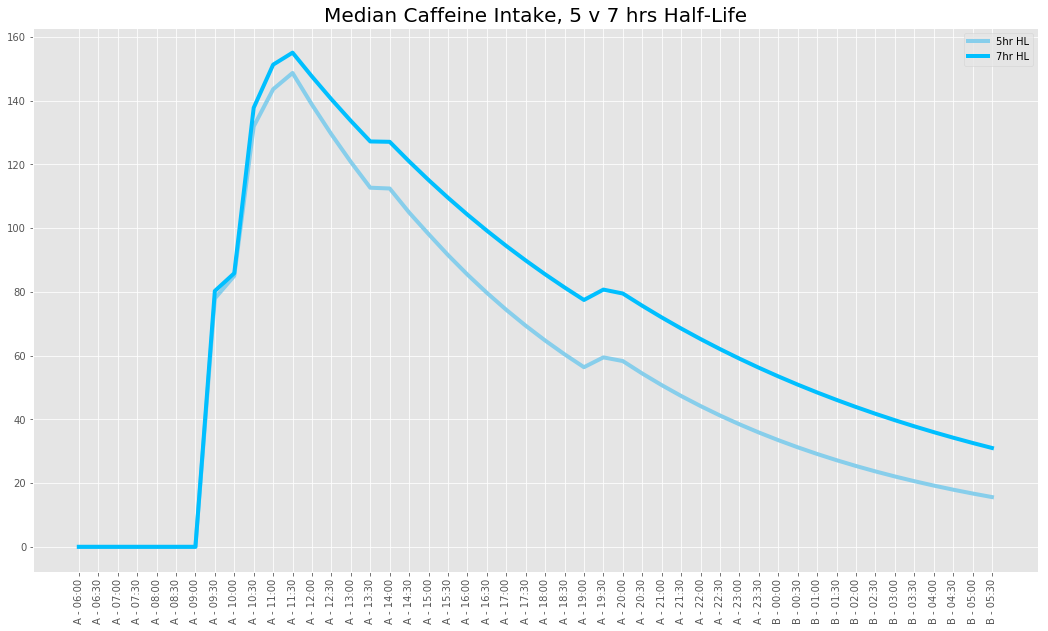

In [41]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation='vertical')

plt.plot( 'day_time_split', 'day_q50', data=df_caff_down, color='skyblue', linewidth=4, label='5hr HL')
plt.plot( 'day_time_split', 'day_q50', data=df_caff_down7, color='deepskyblue', linewidth=4, label='7hr HL')

plt.title("Median Caffeine Intake, 5 v 7 hrs Half-Life", size=20)

plt.legend()
plt.savefig("caff_diff_hl.jpg")
plt.show()

## self v others

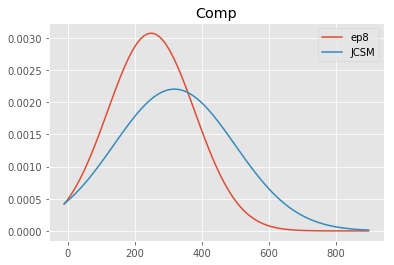

In [42]:
mu = intake_ts_day.sum().describe()['mean']
sigma = intake_ts_day.sum().describe()['std']
x = np.linspace(mu - 2*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="ep8")

mu_jcsm = 319.0
sigma_jcsm = 181.0

plt.plot(x, stats.norm.pdf(x, mu_jcsm, sigma_jcsm), label="JCSM")

plt.title("Comp")

plt.legend()
plt.savefig("caff_comp.jpg")
plt.show()